In [3]:
# 1.1 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [5]:
# 1.2 Load the Dataset

# Load full dataset (slow but necessary for full analysis)
data = pd.read_csv('2019-Oct.csv', low_memory=False, parse_dates=['event_time'])

# Preview data
print("Shape:", data.shape)
data.head()


Shape: (42448764, 9)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [7]:
# 1.3 Basic Inspection
# Column names
print("Columns:", data.columns)

# Check nulls
print("\nMissing values:\n", data.isnull().sum())

# Check data types
data.dtypes

Columns: Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

Missing values:
 event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64


event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                        float64
user_id                        int64
user_session                  object
dtype: object

In [9]:
# 1.4 Drop Unnecessary Null Rows

# Drop rows with no product_id, user_id, or event_type (essential fields)
data.dropna(subset=['product_id', 'user_id', 'event_type', 'user_session'], inplace=True)

# Fill missing brand and category_code with "Unknown"
data['brand'].fillna('Unknown', inplace=True)
data['category_code'].fillna('Unknown', inplace=True)

print("After cleaning, shape:", data.shape)


After cleaning, shape: (42448762, 9)


In [11]:
# 1.5 Feature Engineering: Time-Based

# Make sure event_time is datetime
data['event_time'] = pd.to_datetime(data['event_time'])

# Extract features
data['event_hour'] = data['event_time'].dt.hour
data['event_day'] = data['event_time'].dt.day
data['event_weekday'] = data['event_time'].dt.weekday
data['event_month'] = data['event_time'].dt.month
data['event_date'] = data['event_time'].dt.date

In [13]:
# 1.6 Category-Level Breakdown

# Check top category codes
print("\nTop category codes:")
print(data['category_code'].value_counts().head(10))

# Extract top-level category (e.g., "electronics" from "electronics.smartphone")
data['main_category'] = data['category_code'].apply(lambda x: x.split('.')[0] if '.' in x else x)

print("\nTop main categories:")
print(data['main_category'].value_counts())


Top category codes:
category_code
Unknown                             13515609
electronics.smartphone              11507230
electronics.clocks                   1311033
computers.notebook                   1137623
electronics.video.tv                 1113749
electronics.audio.headphone          1100188
appliances.kitchen.refrigerators      887755
appliances.kitchen.washer             869404
appliances.environment.vacuum         801670
apparel.shoes                         763901
Name: count, dtype: int64

Top main categories:
main_category
electronics     16135621
Unknown         13515609
appliances       4967294
computers        2324217
apparel          1542924
furniture        1247160
auto             1013115
construction      730834
kids              520619
accessories       238238
sport             176616
medicine           14806
country_yard       14089
stationery          7620
Name: count, dtype: int64


In [15]:
# 1.7 Price Statistics

# Check price distribution
print("Price summary:\n", data['price'].describe())

Price summary:
 count    4.244876e+07
mean     2.903237e+02
std      3.582692e+02
min      0.000000e+00
25%      6.598000e+01
50%      1.629300e+02
75%      3.585700e+02
max      2.574070e+03
Name: price, dtype: float64


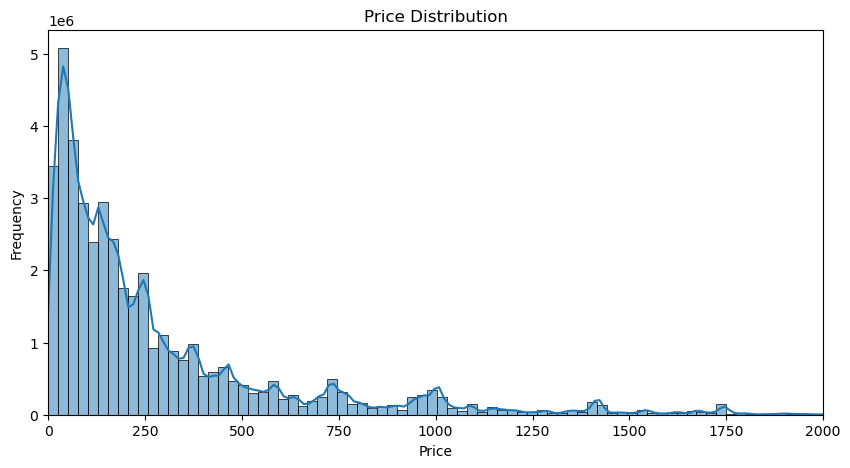

In [17]:
 # Visualize price distribution
plt.figure(figsize=(10,5))
sns.histplot(data['price'], bins=100, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 2000)  # Optional zoom
plt.show()


Event types:
 event_type
view        40779399
cart          926514
purchase      742849
Name: count, dtype: int64


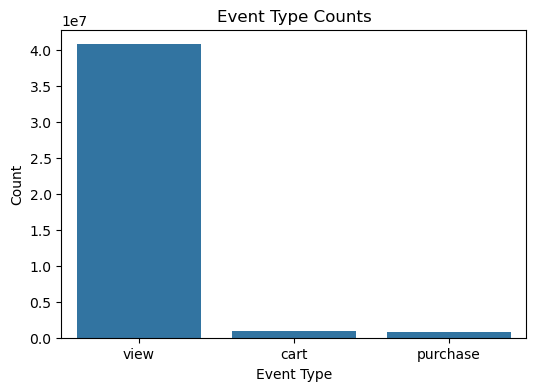

In [19]:
# 1.8 Event Type Counts

event_counts = data['event_type'].value_counts()
print("\nEvent types:\n", event_counts)

# Optional: Plot
plt.figure(figsize=(6,4))
sns.barplot(x=event_counts.index, y=event_counts.values)
plt.title("Event Type Counts")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()

In [ ]:
# 1.9 Save Cleaned Dataset

# Save to new CSV
data.to_csv("cleaned_ecommerce_data.csv", index=False)
print("Cleaned data saved!")